# Setup

In [5]:
import sibilla
import matplotlib.pyplot as plt

def plot(title, keys, res):
    fig = plt.figure(figsize=(21, 9))
    fig.suptitle(title)
    for i, k in enumerate(keys):
        c_plot = fig.add_subplot(2, 2, i+1)
        c_plot.plot(
            [l[0] for l in res[k]], 
            [l[1] for l in res[k]], 
            label = k
        )
        c_plot.set_ylabel("Mean")
        c_plot.set_xlabel("Sample Time")
        c_plot.legend()
    fig.show()

def plot_descriptive(title, keys, res):
    fig = plt.figure(figsize=(21, 9))
    fig.suptitle(title)
    for i, k in enumerate(keys):
        c_plot = fig.add_subplot(2, 2, i+1)
        c_plot.plot(
            [l[0] for l in res[k]], 
            [(l[3], l[2], l[4], l[6], l[5]) for l in res[k]], 
            label = k
        )
        c_plot.set_title(k)
        c_plot.set_ylabel("Value")
        c_plot.set_xlabel("Sample Time")
        c_plot.legend(['Min', 'First Quartile', 'Median', 'Third Quartile', 'Max'])
    fig.show()

# Loading population module

In [6]:
sibilla_runtime = sibilla.SibillaRuntime()
sibilla_runtime.load_module("population")

# Groupies model simulation

Dec 24, 2021 3:26:26 AM it.unicam.quasylab.sibilla.core.simulator.SimulationEnvironment simulate
INFO: The simulation has concluded with success


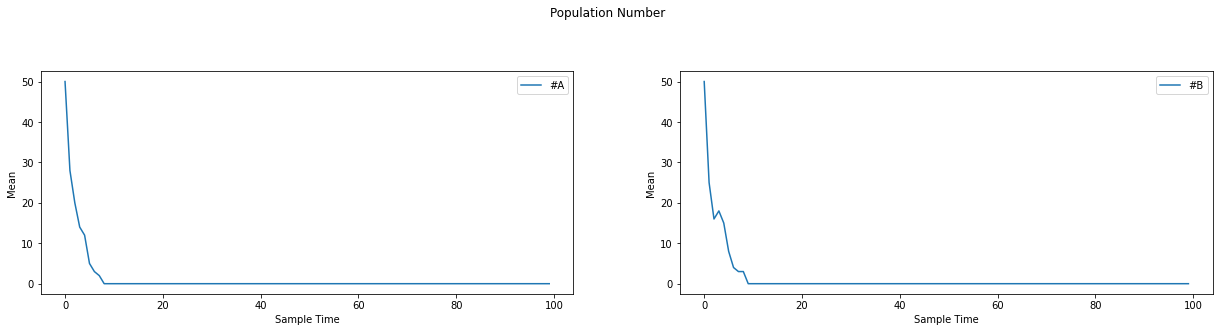

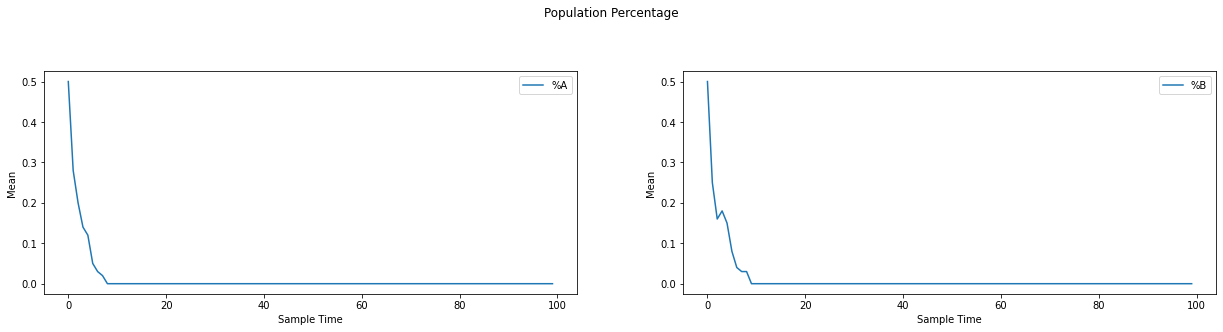

In [7]:
sibilla_runtime.load_from_file("groupies.pm")
sibilla_runtime.set_configuration("balanced")
sibilla_runtime.add_all_measures()
sibilla_runtime.set_deadline(100)
sibilla_runtime.set_dt(1.0)
sibilla_runtime.set_replica(1000)
res = sibilla_runtime.simulate("")
sibilla_runtime.save("results", "groupies_summary_", "__")
plot('Population Number', ["#A", "#B"], res)
plot('Population Percentage', ["%A", "%B"], res)

### Enabling descriptive statistics and resimulating

Dec 24, 2021 3:26:36 AM it.unicam.quasylab.sibilla.core.simulator.SimulationEnvironment simulate
INFO: The simulation has concluded with success


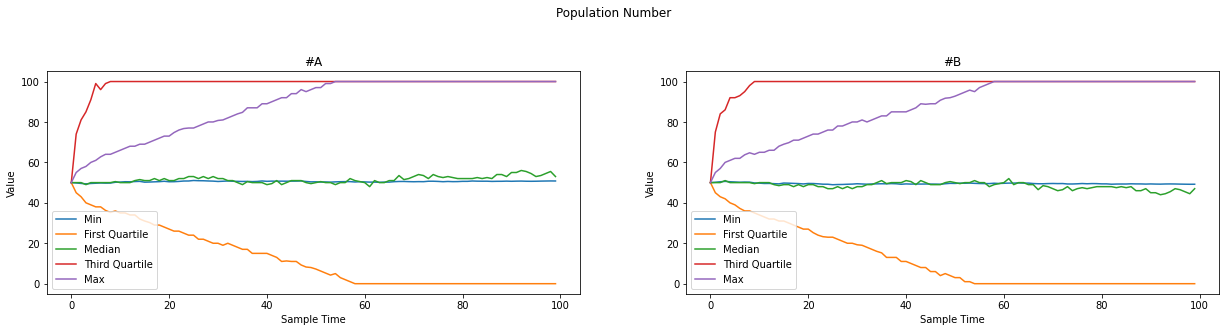

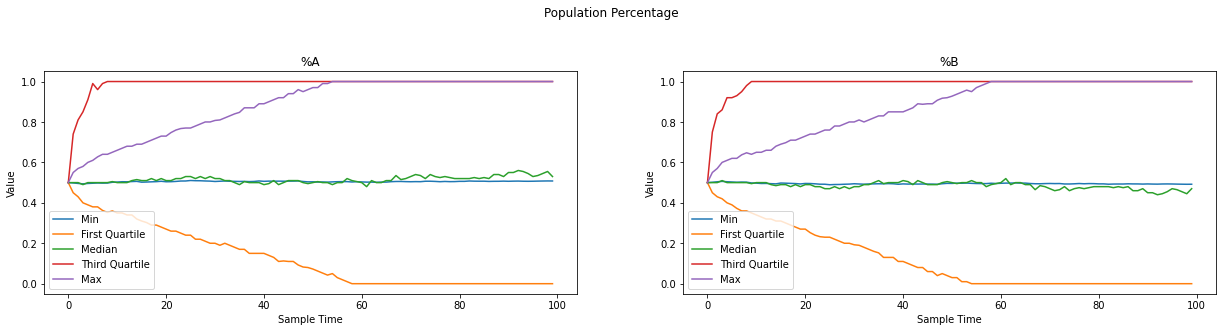

In [8]:
sibilla_runtime.use_descriptive_statistics()
res = sibilla_runtime.simulate("")
plot_descriptive('Population Number', ["#A", "#B"], res)
plot_descriptive('Population Percentage', ["%A", "%B"], res)
sibilla_runtime.save("results", "groupies_descriptive_", "__")

# Groupies2 model simulation

In [ ]:
sibilla_runtime.load_from_file("groupies2.pm")
sibilla_runtime.set_configuration("balanced")
sibilla_runtime.use_summary_statistics()
res = sibilla_runtime.simulate("")
plot('Population Number', ["#A", "#B"], res)
plot('Population Percentage', ["%A", "%B"], res)
sibilla_runtime.save("results", "groupies2_summary_", "__")

### Enabling descriptive statistics and resimulating

In [ ]:
sibilla_runtime.use_descriptive_statistics()
res = sibilla_runtime.simulate("")
plot_descriptive('Population Number', ["#A", "#B"], res)
plot_descriptive('Population Percentage', ["%A", "%B"], res)
sibilla_runtime.save("results", "groupies2_descriptive_", "__")

# Celebr model simulation

In [ ]:
sibilla_runtime.load_from_file("celebr.pm")
sibilla_runtime.set_configuration("balanced")
sibilla_runtime.use_summary_statistics()
res = sibilla_runtime.simulate("")
plot('Population Number', ["#A", "#B"], res)
plot('Population Percentage', ["%A", "%B"], res)
sibilla_runtime.save("results", "celebr_summary_", "__")

### Enabling descriptive statistics and resimulating

In [ ]:
sibilla_runtime.use_descriptive_statistics()
res = sibilla_runtime.simulate("")
plot_descriptive('Population Number', ["#A", "#B"], res)
plot_descriptive('Population Percentage', ["%A", "%B"], res)
sibilla_runtime.save("results", "celebr_descriptive_", "__")